<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
</br>
<p><font size="5"> TAF MCE - 2019</span></p>
<p><font size="4">  UE - B: Stochastic modelling and analysis </font></p>
<p></p>
<p><font size="5">  Projet - Propriétés statistiques des décompositions en paquets d'ondelettes:  </font></p>
<p><font size="4">  Gonzalo Iñaki Quintana - Gustavo Rodrigues dos Reis - Tales Marra  </font></p>
</p></br>
</p>
</CENTER>

----------

In [87]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Theoretical explanation

In this part, we are going to give you an intuitive view about the DWT _(Discrete Wavelet Transform)_ Algorithm, so that you can better visualize and understand the process.

When studying the Fourier transform, we can discover that it is a powerful tool to analyse signals. For example, taking the simple cosine signal:

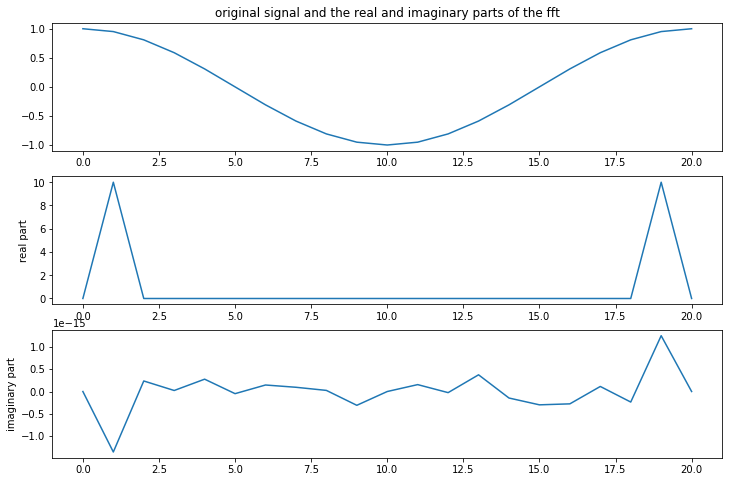

In [14]:
import numpy as np
import matplotlib.pyplot as plt

n = 20

# definition of a
m = np.arange(n)
a = np.cos(m * 2*np.pi/n)

# visualisation of a 
plt.figure(figsize=(12,8))
plt.subplot(311)
plt.plot( np.append(a, a[0]) )
plt.title('original signal and the real and imaginary parts of the fft')
# calcul de A
A = np.fft.fft(a)

# visualisation of A

B = np.append(A, A[0])
plt.subplot(312)
plt.plot(np.real(B))
plt.ylabel("real part")

plt.subplot(313)
plt.plot(np.imag(B))
plt.ylabel("imaginary part")

plt.show()

The Fourier Transform provides us with a complete analysis on the frequency domain, which is quite useful. In this simple
case,however, the dimension of time is not important, as the signal is stationary, and therefore, predictable. 

Real world data is not like that. Taking Apple stock prices for example:


![a](https://www.investopedia.com/thmb/YNlMraE_AO17YtLNvPE9PAz-eQA=/650x366/filters:no_upscale():max_bytes(150000):strip_icc()/2339e6914dfc470bcf2d71f829564fa1-5bfd81f94cedfd0026fefb51)
It is possible to see that there is a lot of irregular behavior on time.

Source: https://www.investopedia.com/thmb/YNlMraE_AO17YtLNvPE9PAz-eQA


### Time x Frequency Analysis

Considering a signal, there are two main types of analysis that are possible to be done with it, in time or in frequency.

When performing time analysis, we have this representation:

![b](time.png)

Source: https://i.stack.imgur.com/i7V58.png

In sampling in time, what is obtained is a great resolution in time, but without any frequency content information. That is, we know well how our signal behaves in time, but we have no idea about frequency behavior.

On the other hand, when performing frequency analysis, we have this representation:

![c](freq.png)

Source: https://i.stack.imgur.com/i7V58.png


When performing the fourier transform, as our signal is transformed into an infinite series of cosines and sines, we do the frequency analysis as represented above, but we completely ignore time dimension, something that is not good when working with real-world data, as the abrupt changes contained for example, in Apple's stock price are important events, and therefore is necessary to conserve information about their time occurency.

So, in order to try to fix that, we will try to produce something like this:
    
![d](ft.png)

Source: https://i.stack.imgur.com/i7V58.png


As the area of each square is fixed (the time bandwidht product in the fourier transform is constant), we can see the compromise appear:

__As we try to increase our resolution in one of the domains (frequency or time), the resolution on the other one decreases automatically.__

Therefore, we will have to try to optimize that, and there is where wavelets and the discrete wavelet transform come in.

### Wavelets

_"A wavelet is a rapidly decaing wave like oscilation that has zero mean"._

A wavelet has a finite duration.

There are many types of wavelets, so you can choose the best one for your problem. 

### Main concepts of Wavelets

#### Scaling : 
Scaling is basically shrinking or streching the signal. 

Mathematically,

<center>$\psi(t/s)>0$</center>

where $s$ is the scaling factor. 
There is a relationship between the scaling factor and the frequency behavior of the signal.

As an example, scaling a sine of a factor of 2 in time means dividing its original frequency by 2.

#### Shifting

Shifting is basically moving our signal throught time to another point.

### Discrete Wavelet Transform (DWT)


In the DWT, the operations of scaling and shifting are done respectively by:


<center>$2^{j}, j =(1,2,3,..)$</center>

<center>$2^{j}m, m =(1,2,3,..)$</center>

The DWT process is equivalent to comparing a signal with discrete multi rate filter banks.

A visual representation of the algorithm is that:

![f](dwt.png)

Source: http://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

We sucessively apply the signal to low-pass and high-pass filters and keey the coefficients given by the output of the high-pass filter. 

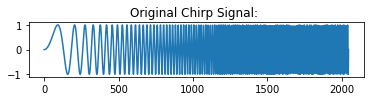

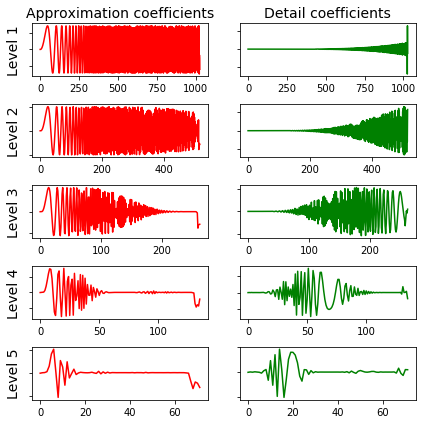

In [16]:
x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

It is an algorithm ideal for denoising and compression, as it allows the representation of the signal with fewer coefficients.

It is possbile to do the decomposition in other ways, producing other _time x frequency_ partitions.

Getting back to the previous representation, what happens can be visualized as follows:

![f](res.jpg)

As it is possible to see,in DWT, in the beggining, when passing the first filters, whe get just the high frequencies and
an excellent time-resolution. As the frequencies begin to decrease, we increase our frequency resolution, but because of 
the compromise, descrease our time resolution.

Thinking the filters in terms of windows, the DWT consists in sucessively passing windows throught the analised signal,
capturing the corresponding frequency, and after subtracting this info from the original signal, increase the size of the
window and repeating the process.

# Simulations

## Random process definition

In [3]:
def ar_process(N, alpha):
    
    X = []
    X_actual = 0
    for i in range(1,N):
        X_plus = alpha * X_actual + np.random.randn() 
        X.append(X_plus)
        X_actual = X_plus
        
    return X

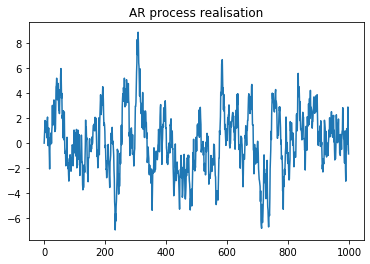

In [4]:
N = 1000
alpha = 0.9
X = []
X_actual = 0
for i in range(1,N):
    X_plus = alpha * X_actual + np.random.randn() 
    X.append(X_plus)
    X_actual = X_plus

plt.plot(X)
plt.title("AR process realisation")
plt.show()

## Autocorrelation function and PSD

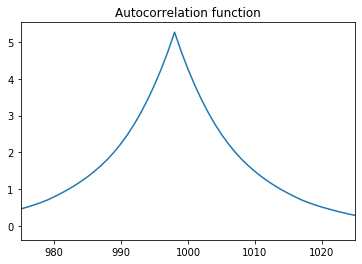

In [5]:
N = 1000
alpha = 0.9
Nrealisations = 100
R = np.zeros(2*N-3)

for j in range(Nrealisations):
    X = []
    X_actual = 0
    for i in range(1,N):
        X_plus = alpha * X_actual + np.random.randn() 
        X.append(X_plus)
        X_actual = X_plus
    R += np.correlate(X,X, mode='full')    
        
R = R/Nrealisations

var = 1/(1-alpha**2)

plt.plot(R/max(R)*var)
plt.xlim([1000-25,1000+25])
plt.title("Autocorrelation function")
plt.show()

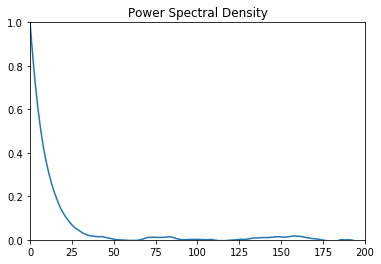

In [6]:
psd = np.fft.fftshift(R)
plt.plot(psd/psd[0])
plt.xlim([0,200])
plt.ylim([0,1])
plt.title("Power Spectral Density")
plt.show()

 ## Multi-level wavelet packet decomposition

We perform a multi-level wavelet packet decomposition of resolution level up to 3 of an AR process of $\alpha=1$ and we plot its approximation ($W_{3,0}$) and detail ($W_{3,1}$, $W_{2,1}$, $W_{1,1}$) coefficients. We chose $\alpha=1$ for having a slower and more correlated process, wich allows us to better see the differences between the approximation (lower frequencies) and the detail (higher frequencies) coefficients. We note that if $\alpha$ is bigger than one, the process is unstable.

In all these simulations, the Daubechies filters were used.

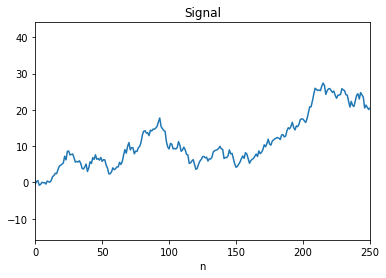

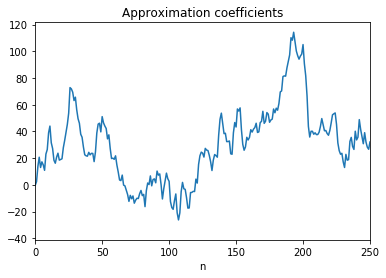

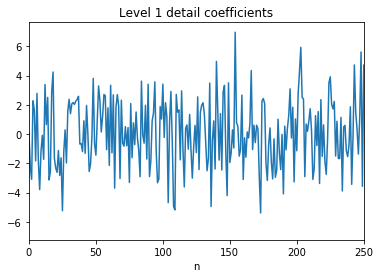

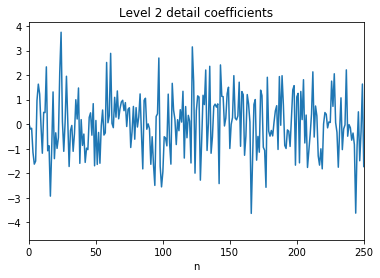

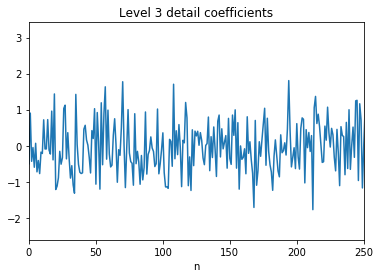

In [19]:
# AR process
alpha = 1
N = 4000
Nrealisations = 100
Rlist = []

X = ar_process(N, alpha)

plt.plot(X)
plt.xlabel('n')
plt.xlim([0,250])
plt.title('Signal')
plt.show()

coefs = pywt.wavedec(X, 'db1', level = 3)

for c,i in zip(coefs,range(len(coefs))):
    
    plt.plot(c)
    plt.xlabel('n')
    plt.xlim([0,250])
    
    if i==0:
        plt.title('Approximation coefficients')
    else:
        plt.title('Level '+str(i)+' detail coefficients')
    
    plt.show()

In [ ]:
for c,i in coefs:
    
    
    
    plt.plot(c)
    plt.xlabel('n')
    plt.xlim([0,250])
    
    if i==0:
        plt.title('Approximation coefficients')
    else:
        plt.title('Level '+str(i)+' detail coefficients')
    
    plt.show()

For $\alpha=0.9$, we estimate the autocorrelation functions of the wavelet coefficients by using the Montecarlo method. We can see that the coefficients related to the higher frequencies are more deocorrelated, as they represent the white noise part of the stochastic process. 

In [97]:
wavelet_decomposition_coeff_name = ['W3,0 decomposition', 'W3,1  decomposition', 
                                    'W2,1 decomposition','W1,1  decomposition']
autocorrelation_names = ['R3,0','R3,1','R2,1','R1,1']

In [98]:
# AR process
alpha = 0.9
N = 4000
Nrealisations = 100
Rlist = []

X = ar_process(N, alpha)

coefs = pywt.wavedec(X, 'db1', level = 3)

for c in coefs:
    Rlist.append(np.correlate(c,c, mode='full')/Nrealisations)

for j in range(Nrealisations-1):

    X = ar_process(N, alpha)
    
    coefs = pywt.wavedec(X, 'db1', level = 3)
    
    for c,i in zip(coefs,range(len(coefs))):
                
        Rlist[i] = Rlist[i] + np.correlate(c,c, mode='full')/Nrealisations

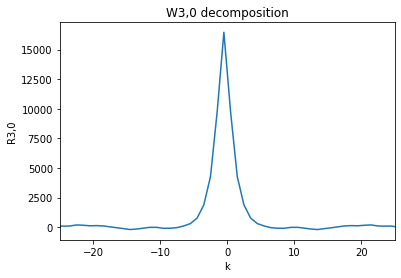

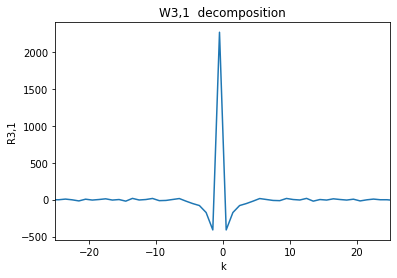

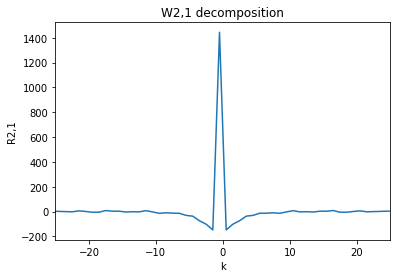

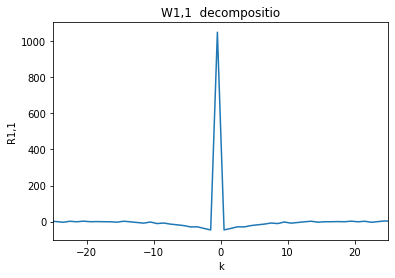

In [77]:
for R, coeff_name,aucorr_name in zip(Rlist,wavelet_decomposition_coeff_name,autocorrelation_names):

    t_axis = range(0, len(R))
    t_axis = t_axis - len(R)/2 * np.ones(len(t_axis))
    
    plt.plot(t_axis,R)
    plt.title(coeff_name)
    plt.xlabel('k')
    plt.ylabel(aucorr_name)
    plt.xlim([-25,25])
    plt.show()

## Decorrelation with respect to the resolution level

We now vary the resolution level of the wavelet packet decomposition and we plot the estimated autocorrelation functions of the approximation coefficients (always using the Montecarlo method). We measure the level of decorrelation by calculating the euclidean distance from each autocorrelation function to a Dirac's delta function. We obtain, as demonstrated in the article, that the coefficients are more decorrelated when the resolution level increases.

Distance to white noise for level 1: 1988.023114953924


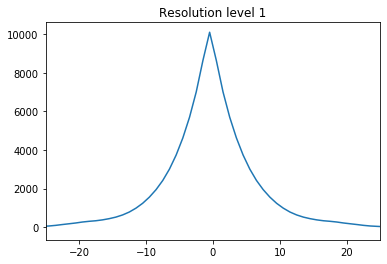

Distance to white noise for level 2: 1064.7353823266424


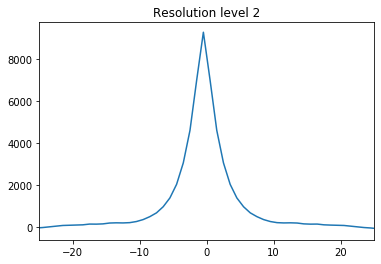

Distance to white noise for level 3: 536.188675358258


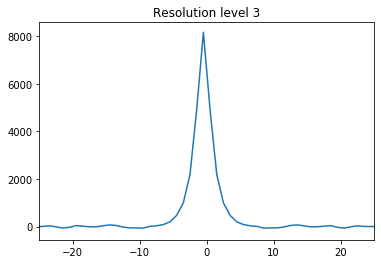

Distance to white noise for level 4: 286.82164510794496


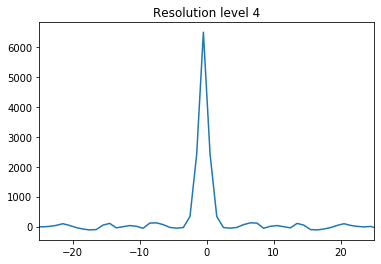

Distance to white noise for level 5: 178.72499578358847


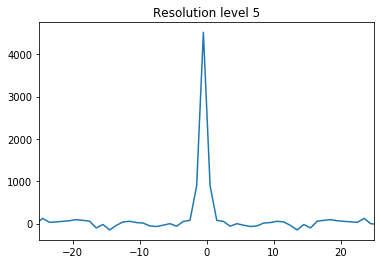

Distance to white noise for level 6: 89.80611690586503


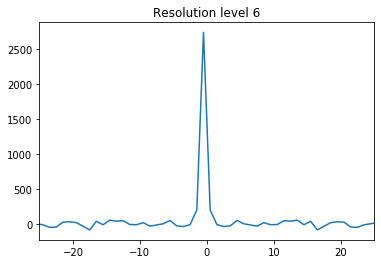

In [128]:
maxLevel = 7
Nrealisations = 100
N = 2000
alpha = 0.9
delta = 25

for level in range(1,maxLevel):
    
    # AR process
    
    X = ar_process(N, alpha)
    
    coefs = pywt.downcoef('a',X, 'db1', level = level)
    
    R = np.correlate(coefs,coefs, mode='full')/Nrealisations
        
    for j in range(Nrealisations-1):
        
        X = ar_process(N, alpha)
        
        coefs = pywt.downcoef('a',X, 'db1', level = level)
                
        R += np.correlate(coefs,coefs, mode='full')/Nrealisations
                
    
    # white noise

    Nwn = len(coefs)
    R_white_noise = np.zeros(2*Nwn-1)

    for j in range(Nrealisations):

        X = np.random.randn(Nwn)

        R_white_noise += np.correlate(X,X, mode='full')/Nrealisations

    distance = np.mean(abs(R_white_noise[int(len(R)/2)-delta:int(len(R)/2)+delta]-R[int(len(R)/2)-delta:int(len(R)/2)+delta]))
    
    print("Distance to white noise for level "+str(level)+": "+str(distance))
    
    ## plot
    
    t_axis = range(0, len(R))
    t_axis = t_axis - len(R)/2 * np.ones(len(t_axis))


    plt.figure()
    plt.plot(t_axis,R)
    plt.title("Resolution level "+str(level))
    plt.xlim([-25,25])
    plt.show()

In [106]:
maxLevel = 15
Nrealisations = 100
N = 50000
alpha = 0.9
delta = 25

distances = []

for level in range(0,maxLevel):
    
    # AR process
    
    X = ar_process(N, alpha)
    
    coefs = pywt.wavedec(X, 'db1', level = level)
    
    R = np.correlate(coefs[0],coefs[0], mode='full')/Nrealisations
    
    for j in range(Nrealisations):
        
        X = ar_process(N, alpha)

        coefs = pywt.wavedec(X, 'db1', level = level)
                
        R += np.correlate(coefs[0],coefs[0], mode='full')/Nrealisations
    
    
    # white noise

    Nwn = len(coefs[0])
    R_white_noise = np.zeros(2*Nwn-1)

    for j in range(Nrealisations-1):

        X = np.random.randn(Nwn)

        R_white_noise += np.correlate(X,X, mode='full')/Nrealisations

    distance = np.mean(abs(R_white_noise[int(len(R)/2)-delta:int(len(R)/2)+delta]-R[int(len(R)/2)-delta:int(len(R)/2)+delta]))
    distances.append(distance)

We then plot the "decorrelation coefficient" (defined as the distance to a Dirac delta function) as a function of the resolution level. We have normalized these coefficients for better visualization.

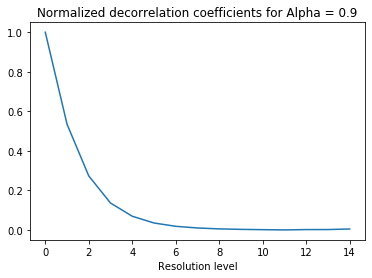

In [110]:
plt.plot(distances/max(distances))
plt.xlabel('Resolution level')
plt.title('Normalized decorrelation coefficients for Alpha = 0.9')
plt.show()

## Decorrelation with respect to the resolution level for differentes alphas

We repeat the previous simulation for different values of $\alpha$ and we plot the non-normalized decorrelation coefficient (the fact of no normalizing it allows us to compare the results for different Alphas). We obtain, as expected, that the coefficients are more decorrelated as $\alpha$ gets smaller. This is due to the fact that the input process X gets more similar to a white gaussian process (and, as a consequence, it gets less correlated) as this coefficients get smaller.

In [130]:
maxLevel = 10
Nrealisations = 100
N = 5000
alphas = [0.2,0.4,0.6,0.9]
delta = 25
index = 0

distances_alpha = []

for alpha in alphas:

    distances = []

    for level in range(0,maxLevel):

        # AR process

        X = ar_process(N, alpha)

        coefs = pywt.wavedec(X, 'db1', level = level)

        R = np.correlate(coefs[0],coefs[0], mode='full')

        for j in range(Nrealisations):

            X = ar_process(N, alpha)

            coefs = pywt.wavedec(X, 'db1', level = level)

            R += np.correlate(coefs[0],coefs[0], mode='full')

        R = R/Nrealisations


        # white noise

        Nwn = len(coefs[0])
        R_white_noise = np.zeros(2*Nwn-1)

        for j in range(Nrealisations):

            X = np.random.randn(Nwn)

            R_white_noise += np.correlate(X,X, mode='full')

        R_white_noise = R_white_noise/Nrealisations

        distance = np.mean(abs(R_white_noise[int(len(R)/2)-delta:int(len(R)/2)+delta]-R[int(len(R)/2)-delta:int(len(R)/2)+delta]))
        distances.append(distance)
    distances_alpha.append(distances)
    index += 1

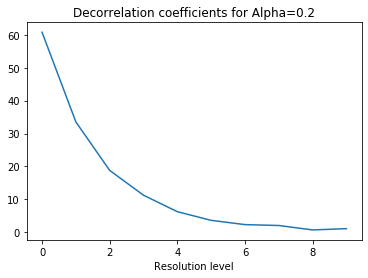

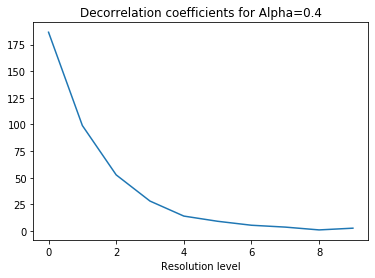

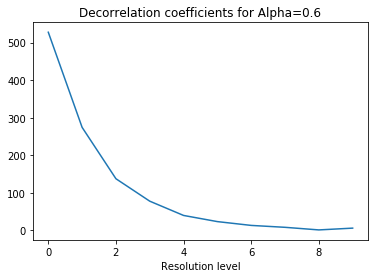

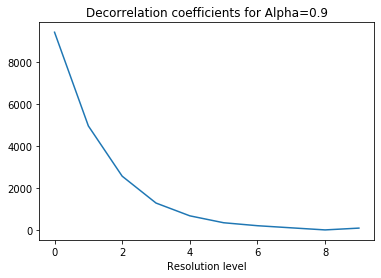

In [131]:
for i in range(len(alphas)):

    plt.plot(distances_alpha[i])
    plt.title("Alpha="+str(alphas[i]))
    plt.xlabel('Resolution level')
    plt.title('Decorrelation coefficients for Alpha='+str(alphas[i]))
    plt.show()

## Signal reconstruction

In this simulation, we decompose an AR process of α = 0.95 into wavelets packets of levels 1, 2, 3 and 4. We show the reconstructed signal and calculate the reconstruction errors (mean squared error between the two signals).

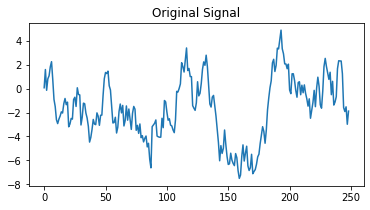

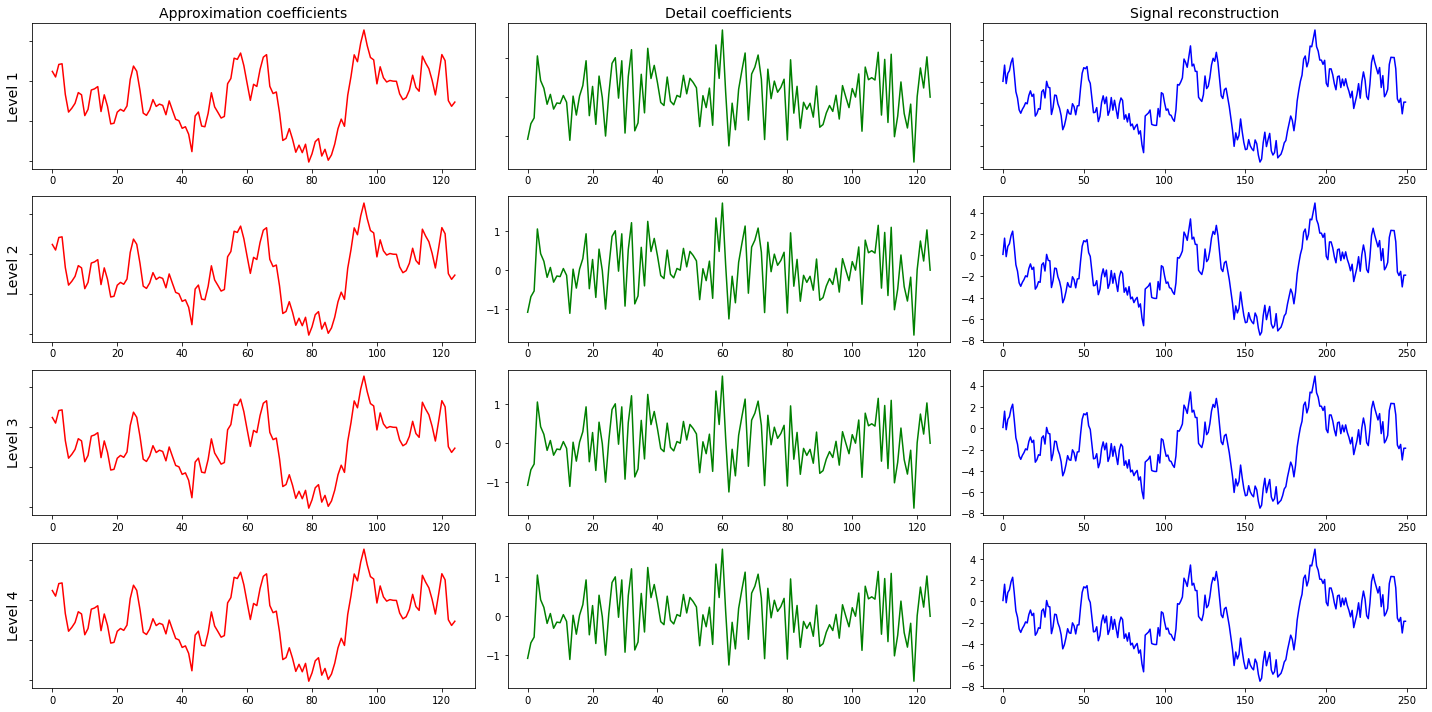

Mean Squared Error for level 1: 7.434956253809705e-29
Mean Squared Error for level 2: 3.8686539978895284e-29
Mean Squared Error for level 3: 4.3126964058674495e-29
Mean Squared Error for level 4: 1.617935227680829e-29


In [72]:
alpha = 0.95
N = 250
Nrealisations = 100
errors = []
maxLevel = 4

X = ar_process(N, alpha)

fig, ax = plt.subplots(figsize=(6,3))
ax.set_title("Original Signal")
ax.plot(X)
plt.show()
 
fig, axarr = plt.subplots(nrows=maxLevel, ncols=3, figsize=(20,10))
for ii in range(maxLevel):
    (coeff_a, coeff_d) = pywt.dwt(X, 'db1')
    X_hat = pywt.idwt(coeff_a, coeff_d, 'db1')
    axarr[ii, 0].plot(coeff_a, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 2].plot(X_hat, 'b')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    errors.append(sum([(s1-s2)**2 for s1,s2 in zip(X,X_hat)]))
    X = X_hat
    
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
        axarr[ii, 2].set_title("Signal reconstruction", fontsize=14)
        axarr[ii, 1].set_yticklabels([])
        axarr[ii, 2].set_yticklabels([])

plt.tight_layout()
plt.show()

i = 1
for e in errors:
    print('Mean Squared Error for level ' + str(i) + ': ' + str(e))
    i += 1

# Correlation analysis when all the coefficients have the same resolution level

We analyze the correlation functions of the $W_{2,0}$, $W_{2,1}$, $W_{2,2}$ and $W_{2,3}$ coefficients.

In [77]:
wavelet_decomposition_coeff_name = ['W2,0 decomposition', 'W2,1  decomposition', 
                                    'W2,2 decomposition','W2,3  decomposition']
autocorrelation_names = ['R2,0','R2,1','R2,2','R2,3']

In [78]:
# AR process
alpha = 0.9
N = 4000
Nrealisations = 100
Rlist = []

X = ar_process(N, alpha)
(coeff_a, coeff_d) = pywt.dwt(X, 'db1')
(r20, r21) = pywt.dwt(coeff_a, 'db1')
(r22, r23) = pywt.dwt(coeff_d, 'db1')

coefs = [r20, r21, r22, r23]

for c in coefs:
    Rlist.append(np.correlate(c,c, mode='full')/Nrealisations)
    
for j in range(Nrealisations-1):

    X = ar_process(N, alpha)
    
    (coeff_a, coeff_d) = pywt.dwt(X, 'db1')
    (r20, r21) = pywt.dwt(coeff_a, 'db1')
    (r22, r23) = pywt.dwt(coeff_d, 'db1')

    coefs = [r20, r21, r22, r23]
        
    for c,i in zip(coefs,range(len(coefs))):
                
        Rlist[i] = Rlist[i] + np.correlate(c,c, mode='full')/Nrealisations

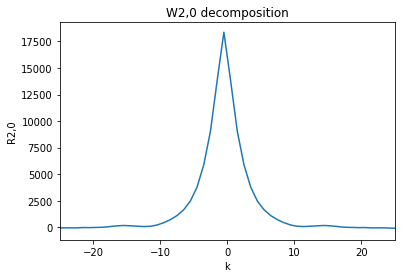

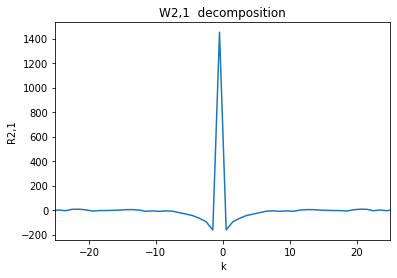

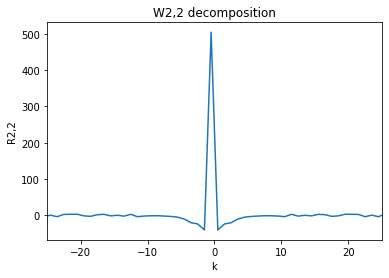

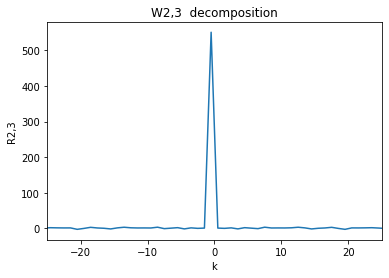

In [79]:
for R, coeff_name,aucorr_name in zip(Rlist,wavelet_decomposition_coeff_name,autocorrelation_names):

    t_axis = range(0, len(R))
    t_axis = t_axis - len(R)/2 * np.ones(len(t_axis))
    
    plt.plot(t_axis,R)
    plt.title(coeff_name)
    plt.xlabel('k')
    plt.ylabel(aucorr_name)
    plt.xlim([-25,25])
    plt.show()

# Quadratic Mean Integral

Let's consider a second order random process $X(t)$ on $T$ considered as an application of $T$ in $\mathcal{V}$ = set of random variables on $(\Omega, \mathcal{F}, P)$.

More precisely for any $t \in T$, $X(t)$ is an element of $\mathcal{L}^{2}(\Omega, \mathcal{F}, P)$ and $\mathcal{L}^{2}(\Omega, \mathcal{F}, P)$ is a Hilbert space with the scalar product: 
$\langle\,X,Y\rangle$ = $\int X \overline{\rm Y} dP$

Therefore:

$$E[X(t)\overline{\rm X}(t')] = \Gamma(t,t') = \langle\,X(t),X(t')\rangle$$ and

$$E[|X(t)|^{2}] = \Gamma(t,t') = ||X(t)||^{2} $$


The Schwarz's inequality shows that the scalar product is continuous:
$$E[\lim_{\substack {s\to\ s_{o} \\ m.q.}} X_{s} \overline{X_{o}}] = \langle\,\lim_{\substack {s\to\ s_{o} \\ m.q.}} X_{s} \overline{X_{o}}\rangle = \lim_{\substack {s\to\ s_{o} \\ m.q.}} \langle\,X_{s} \overline{X_{o}\rangle}$$

$$=\lim_{s \to s_{o}} E[X_{s} \overline{X_{o}}]$$

$$\lim_{\substack{s \to s_{o} \\ m.q. }} X_{s} = X$$ means:

$$\lim_{s \to s_{o}} ||X_{s}- X|| = 0$$ or $$\lim_{s \to s_{o}} E[|X_{s}- X|^{2}] = 0$$

### Lemma:

Let $X_{s}(t)$ be a second order random process, it converges in root mean square to a random process $X(t)$ (necessarily a second order one), when $s \to s_{o}$, if and only if $E[X_{s}(t) \overline X_{s'}(t)]$ converges to a finite function $F(t)$ on $T$ when $s \to s_{o}$ and $s' \to s_{o}$. 

So $\Gamma_{X_{s}}(t,t')$ converges to $\Gamma_{X}(t,t')$


### Demonstration: 

- Sufficient condition:

Assumption: $E[X_{s}(t) \overline {X_{s'}}(t)] \to F(t)$ finite when $s \to s_{o}$ and $s' \to s_{o}$.


Thereafter: $||X_{s} - X_{s'}||^{2}$ = $ ||| X_{s} (t) |||^{2} + ||| X_{s'} (t) ||^{2} - \langle\,X_{s} (t)\rangle - \langle\,X(t),X_{s}(t)\rangle $ converges to $0$ when $s \to s_{o}$ and $s' \to s_{o}$.


$\substack{X_{s}(t) \to s_{o}}$ is a Cauchy filter therefore it converges in quadratic mean sense.

The necessary condition and the following property $\Gamma_{X_{s}} (t,t') \to \Gamma_{X} (t,t') $ is a result from the continuity of the scalar product.


## Continuity in the quadratic mean sense

In order to $X(t)$ to be continuous in quadratic mean sense on $T$, it is necessary and sufficient that $ \Gamma(t,t')$ is continuous on the diagonal $ \Delta$ of $T x T$. And then $\Gamma(t,t')$ is continuous in $T x T$.


$X(t)$ quadratic mean continuous.: $X(t+h) \substack{ \to \\ m.q.} X(t)$ when $h \to 0$.


- The necessary condition results from the continuity of the scalar product.


- Sufficient condition.

We assume $\Gamma (t,t')$ continues at any point of $\Delta$. $||X(t+h) - X(t)|^{2} = ||X(t+h)|^{2} - \langle\,X(t+h),X(t)\rangle - \langle\,X(t),X(t+h)\rangle + |||X(t)|^{2} = \Gamma(t+h, t+h) -\Gamma(t, t+h) - \Gamma(t, t+h) + \Gamma(t, t)$

The hypothesis therefore leads to $||X(t+h) - X(t)||^{2} \to 0$ when $h \to 0$ therefore $X(t+h) \substack { \to \\ m.q.}$ when $h \to 0$.

## Integration in quadratic mean sense

Let $X(t)$ and $Y(t)$ be two second order random processes of covariance $\Gamma_{X}(t,t')$ and $\Gamma_{Y}(t,t')$, which are not assumed to be centred. Indeed, we will consider special cases in which one or the other of these functions will be a surely function.


- Definition $\int_{a}^{b} X(t) dY(t)$ Riemann–Stieltjes quadratic mean integral

Let $a = t_{1}  \leqslant \theta_{1} < t_{2}  \leqslant \theta_{2} ... t_{n}  \leqslant \theta_{n} < t_{n+1} = b$, $D = (a, \theta_{1}, t_{2}, ..., \theta_{n}, b )$. $|D| = \sup_{k}|t_{k+1} - t_{k}|$

$S_{D} = \sum_{k=1}^{n} X(\theta_{k})(Y(t_{k+1}) - Y(t_{k}))$.

If $S_{D}$ has a quadratic mean limit when $|D| \to 0$ we can say:

Quadratic mean integral $\int_{a}^{b} X(t) dY(t) = \lim_{\substack{|D| \to 0 \\ m.q.}} \sum_{k=1}^{n} = X(\theta_{k})(Y(t_{k+1}) - Y(t_{k}))$

It is sufficient to give $Y(t)$ defined at the addition near a random variable (independent of $t$).

Quadratic mean integral is  $\int_{a}^{+\infty}X(t) dY(t) = \lim_{\substack{b \to +\infty \\ m.q.}} \int_{a}^{b} X(t)dY(t)$ as long as that limit exists.

### Theorem:

Let $I$ be a finite or infinite interval.

If $X(t)$ is a second order random process and is independent of another second order random process $Y(t')$ over $I x I$ .

It's necessary and sufficient for the existance of the quadratic mean integral $\int_{I} X(t)dY(t)$ that:

The integral $\iint_{I x I} \Gamma_{X}(t,t') d(d'\Gamma_{Y}(t,t')$ exists.

Suposing $I$ finite, let $\mathcal{D}$ be ths set of all the partitions $D$ de $I$, $(D_{S})_{D \in \mathcal{D}}$ is a family of second order random variables with a finite covariance:

$E[S_{D} \overline {S}_{D'}] < +\infty$

Indeed:

$E[S_{D} \overline {S}_{D'}]= \sum_{k=1}^{n}$ $\sum_{k'=1}^{n'}E[X_{\theta_{k}}(Y_{k+1} -Y_{k})X_{\theta'_{k'}}(Y_{k'+1} -Y_{k'})] = \sum_{k=1}^{n}$ $\sum_{k'=1}^{n'} \Gamma_{X}(\theta_{k},\theta'_{k'})\Delta_{t_{k+1}- t_{k}} \Delta_{t'_{k'+1}- t'_{k'}} \Gamma_{Y}(t_{k},t'_{k'})$ (I)

Using an extension of the lemma to $S_{D}$ have a quadratic mean limit when $|D| \to 0$ it's necessary and sufficient that $E[S_{D}\overline{S}_{D'}]$ has a limit when $|D| \to 0$ and $|D'| \to 0$.

According to equality (I) this means that the integral $\iint_{I x I} \Gamma_{X}(t,t') d(d'\Gamma_{Y}(t,t')$ exists.

In [51]:
from math import sqrt
from scipy.stats import norm
import numpy as np
from pylab import plot, show, grid, xlabel, ylabel, figure,title
from scipy.linalg import sqrtm
import math

def brownian(x0, n, dt, delta):
    """
    Arguments
    ---------
    x0 :The initial position of the Brownian motion.
    n : The number of steps.
    dt :Time step.
    delta : variance is delta**2*t.
    """

    x0 = np.asarray(x0)
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))
    out = np.empty(r.shape)
    np.cumsum(r, axis=-1, out=out)
    out += np.expand_dims(x0, axis=-1)

    return out

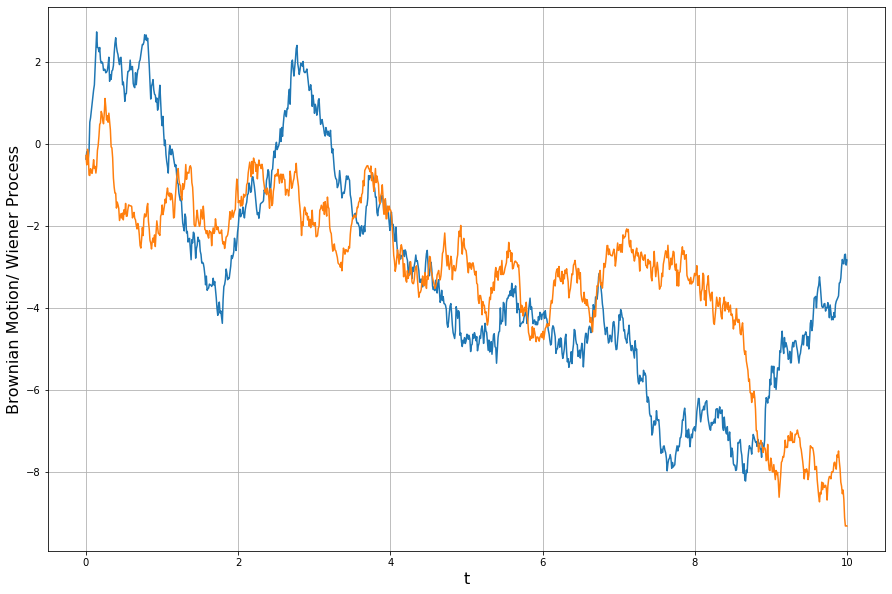

In [52]:
# The Wiener process parameter.
delta = 2
# Total time.
T = 10.0
# Number of steps.
N = 1000
# Time step size
dt = T/N

# Create an empty array to store the realizations.
# Initial values of x.
x = np.empty(N+1)
y = np.empty(N+1)

x[0] = 0
y[0] = 0
x = brownian(x[0], N, dt, delta)
y = brownian(y[0], N, dt, delta)

t = np.linspace(0.0, N*dt, N)
figure(figsize=(15,10))
plot(t, x)
plot(t,y)
xlabel('t', fontsize=16)
ylabel('Brownian Motion/ Wiener Process', fontsize=16)
grid(True)
show()



## Karhunen–Loève theorem

A very interesting possibility that the definition of integration in quadratic mean sense provides is the decomposition that comes from the Karhunen-Loève theorem that states that a stochastic process can be represented as an infinite linear combination of orthogonal functions.

A centered stochastic process ${X_{t}}$ ${t \in [a,b]}$ and $E[X_{t}] = 0$ for all $t \in [a,b]$, when satisfied certain conditions of continuity, it's possible to write $X_{t}$ as:

$X_t = \sum_{k = 1}^{+\infty} Z_{k}e_{k}(t)$

Where:

- $Z_{k}$ are pairwise unrelated random variable
- $e_{k}(t)$ are known as eigenfunctions - continuous real-valued functions in $[a,b]$ that are pairwise      orthogonal in $L^{2}([a,b])$, each one of those are associated with a respective eigenvalue $\lambda_{k}$



For a Wiener Process restricting it in the time domain [a, b]=[0,1] without loss of generality we can find that:

Eigenfunctions:

$e_k(t) = \sqrt{2} \sin \left( \left(k - \tfrac{1}{2}\right) \pi t \right)$

Eigenvalues:

$\lambda_k = \frac{1}{(k -\frac{1}{2})^2 \pi^2}$

We can approximate a Wiener Process truncating the Karhunen–Loève theorem infinity series to a finite one with k terms, using the eigenfunctions and eigenvalues above and $k$ unrelated gaussian random variables as the $Z_{k}$

In [53]:
# Generate 1000 gaussian random variables for the Loeve approximation of the Wiener Process

Z_k = np.asarray([np.random.randn() for i in range(1000)])

In [54]:
def eigenfunction_wiener (t,k):
    return (sqrt(2)/((k+0.5)*math.pi))* np.sin((k+0.5)*math.pi*t)

def KLE_restitution(nb, Z_k):
    np.random.seed(100)
    n = 1
    restitution = np.zeros(nb)
    t = np.linspace(1,0,nb)
    while(n != nb):
        eigenfunc = eigenfunction_wiener(t,n)
        restitution += np.multiply(Z_k,eigenfunc)
    n +=1
    return restitution,t

In [60]:
Z_k = np.asarray([norm.rvs(size=1) for i in range(1000)])

def eigenfunction_wiener (t,k):
    return (sqrt(2)/((k+0.5)*math.pi))* np.sin((k+0.5)*math.pi*t)

def KLE_restitution(nb, Z_k):
    np.random.seed(100)
    n = 1
    restitution = np.zeros(nb)
    t = np.linspace(1,0,nb)
    while(n != nb):
        eigenfunc = eigenfunction_wiener(t,n)
        restitution += np.multiply(Z_k,eigenfunc)
    n +=1
    return restitution,t

In [ ]:
restitution_10,t = KLE_restitution(10,Z_k[0:10,0])

In [ ]:
restitution_100,t1 = KLE_restitution(100,Z_k[0:100,0])

In [ ]:
restitution_1000,t2 = KLE_restitution(1000,Z_k[0:1000,0])

In [ ]:
figure(figsize=(20,10))
plot(t, restitution_10, '--')
plot(t1,restitution_100, '--')
plot(t2,restitution_1000, '--')

xlabel('t', fontsize=16)
ylabel('Wiener process', fontsize=16)
grid(True)
show()

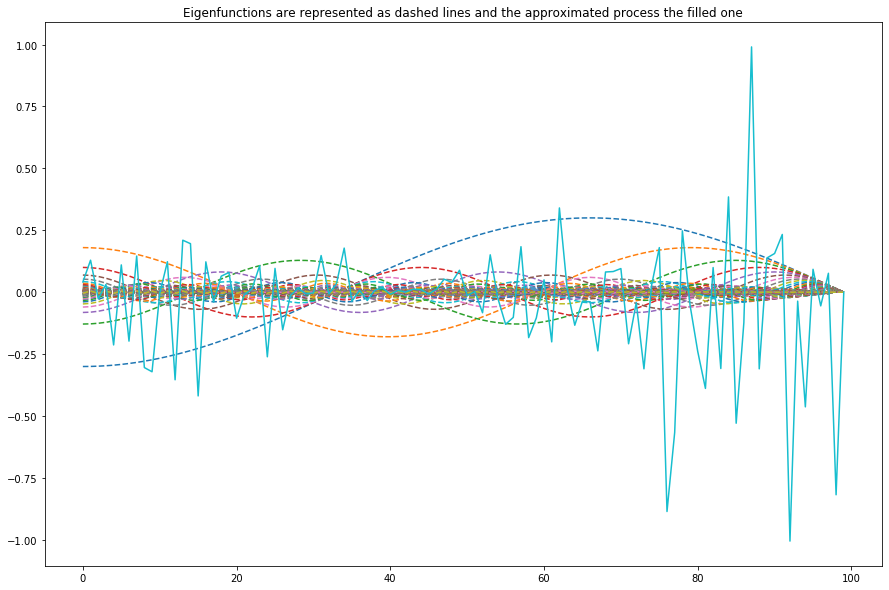

In [38]:
np.random.seed(100)
t = np.linspace(1,0,100)
result = np.zeros(t.size)
figure(figsize=(15,10))
title(label= "Eigenfunctions are represented as dashed lines and the approximated process the filled one")
for i in range(1,100):
    result+= eigenfunction_wiener (t,i)*Z_k[0:100]
    plot(eigenfunction_wiener (t,i), '--')
plot(result)
show()

## Bibliography:

FAUCONNET - Calcul en moyenne quadratique : continuité, dérivation et intégration. Available in : http://www.numdam.org/item/?id=PSMIR_1964-1965____A7_0

Karhunen–Loève theorem. Available in: https://en.wikipedia.org/wiki/Karhunen%E2%80%93Lo%C3%A8ve_theorem